In [4]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from time import sleep
import pandas as pd
from tqdm import tqdm
from datetime import datetime
import requests
import pandas as pd
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
import json

import seaborn as sns

In [4]:
option = Options()
option.headless = True
driver = webdriver.Firefox(options=option)

In [5]:
url_dict = {"São José dos Campos": "https://www.vivareal.com.br/aluguel/sp/sao-jose-dos-campos/apartamento_residencial/"}

errors = []
results = []

In [8]:
for city, url in url_dict.items():
    current_url = url
    driver.get(url)
    sleep(2)
    actions = ActionChains(driver)
#Primeiro, vamos garantir aceitar os cookies da página (First, let's make sure to accept the cookies on the page) 
    try:
        driver.find_element_by_class_name("cookie-notifier__cta").click()
    except:
            print("No cookies!")
    #Agora vamos percorrer diversas páginas de resultados da pesquisa no website 
    #(Now we are going to scroll through several search results pages on the website)
    for i in tqdm(range(144), desc=city):
    
    #Primeiramente eu rodei com 200 páginas, mas retornou erro pois só vai até a página 145 nesse caso, 
    #então para pegar toda a informação eu escolhi colocar exatamente 144 na opção range.
    #(First I've tried with 200 pages, but it return an error because it only goes to 145 pages in this case, 
    #so to get all the information, I've choosed to put it exactly 144 in the range option.)   
        
        sleep(5)
        main_div = driver.find_element_by_class_name("results-main__panel")
        properties = main_div.find_elements_by_class_name("js-property-card")
        paginator = driver.find_element_by_class_name("js-results-pagination")
        next_page = paginator.find_element_by_xpath("//a[@title='Próxima página']") #/html/body/main/div[2]/div[1]/section/div[2]/div[2]/div/ul/li[9]/a
        
        #Percorrer cada apartamento da página e guardar as informações desejadas
        #(Scroll through each apartment on the page and save the wanted information)
        for i,apartment in enumerate(properties):
            url = apartment.find_element_by_class_name("js-card-title").get_attribute("href")
            apto_id = url.split("id-")[-1][:-1]
            header = apartment.find_element_by_class_name("property-card__title").text
            address = apartment.find_element_by_class_name("property-card__address").text
            area = apartment.find_element_by_class_name("js-property-card-detail-area").text
            rooms = apartment.find_element_by_class_name("js-property-detail-rooms").text
            bathrooms = apartment.find_element_by_class_name("js-property-detail-bathroom").text
            garages = apartment.find_element_by_class_name("js-property-detail-garages").text
            #Tratar casos onde não há amenidades (Treat cases where there are no amenities):
            try:
                amenities = apartment.find_element_by_class_name("property-card__amenities").text
            except:
                amenities = None
                errors.append(url)
            price = apartment.find_element_by_class_name("js-property-card-prices").text
            #Tratar casos onde não há preço do condomínio (Treat cases where there is no condo fee):
            try:
                condo = apartment.find_element_by_class_name("js-condo-price").text
            except:
                condo = None
                errors.append(url)
            crawler = city
            crawled_at = datetime.now().strftime("%Y-%m-%d %H:%M")
            #Criar dicionário com as informações de cada apartamento 
            #(Create dictionary with the information of each apartment)
            results.append({"id": apto_id,
                            "url": url,
                            "header": header,
                            "address": address,
                            "area": area,
                            "rooms": rooms,
                            "bathrooms": bathrooms,
                            "garages": garages,
                            "amenities": amenities,
                            "price": price,
                            "condo": condo,
                            "crawler": crawler,
                            "crawled_at": crawled_at})
            pd.DataFrame(results).to_csv("partial_results.csv.", index=False)
        #Clicar na próxima página pesquisada (Click on the next searched page):
        next_page.click()
#Criar um data frame, no formato csv, no Pandas com os dados coletados e fechar o navegador!  
#(Create a data frame, in csv format, in Pandas with the collected data and close the browser!)
pd.DataFrame(results).to_csv("full_results.csv", index=False)
driver.close()


## Methods: 

No cookies!


São José dos Campos:  55%|█████▍    | 79/144 [12:36<10:22,  9.57s/it]


ElementClickInterceptedException: Message: Element <a class="js-change-page" href="#pagina="> is not clickable at point (1058,659) because another element <li class="pagination__item"> obscures it


In [6]:
df_an = pd.read_csv('partial_results_it_35.csv')
df_an

,id,url,header,address,area,rooms,bathrooms,garages,amenities,price,condo,crawler,crawled_at
0,2535164685,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 72m²","Rua Raimundo Barbosa Nogueira, 321 - Palmeiras...",72,2 Quartos,2 Banheiros,1 Vaga,Elevador\nCondomínio fechado\nEspaço gourmet\n...,R$ 1.300 /mês,R$ 320,São José dos Campos,2021-10-30 14:34
1,2537801599,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos para Aluguel, 150m²","Rua das Carpas, 70 - Parque Residencial Aquari...",150,4 Quartos,4 Banheiros,2 Vagas,Piscina\nMobiliado\nChurrasqueira\nAcademia\nA...,R$ 5.500 /mês,R$ 914,São José dos Campos,2021-10-30 14:34
2,2530440590,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 2 Quartos para Aluguel, 78m²","Avenida São João, 221 - Jardim Esplanada, São ...",78,2 Quartos,2 Banheiros,2 Vagas,Mobiliado\nElevador\nAceita animais\nVaranda g...,R$ 2.200 /mês,R$ 597,São José dos Campos,2021-10-30 14:34
3,2531369085,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 3 Quartos para Aluguel, 75m²","Rua Ruivo, 113 - Parque Residencial Aquarius, ...",75,3 Quartos,2 Banheiros,1 Vaga,Piscina\nChurrasqueira\nCondomínio fechado\nEs...,R$ 2.300 /mês,NaN,São José dos Campos,2021-10-30 14:34
4,2538232877,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com 4 Quartos para Aluguel, 118m²","Rua Laurent Martins, 479 - Jardim Esplanada, S...",118,4 Quartos,2 Banheiros,2 Vagas,Piscina\nMobiliado\nChurrasqueira\nElevador\nC...,R$ 4.500 /mês,R$ 650,São José dos Campos,2021-10-30 14:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,2530127394,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 2 Quartos para Venda/Aluguel 52m²,"Rua República de Israel - Jardim Oswaldo Cruz,...",52,2 Quartos,1 Banheiro,1 Vaga,Churrasqueira\nElevador\nInterfone\nPiscina\nS...,R$ 1.700 /mês\nR$ 310.000,R$ 450,São José dos Campos,2021-10-30 14:48
3129,2530124434,https://www.vivareal.com.br/imovel/apartamento...,"Apartamento com Quarto para Aluguel, 52m²",Avenida Doutor Nelson D'Avila - Jardim São Dim...,52,1 Quarto,1 Banheiro,1 Vaga,Piscina\nMobiliado\nElevador\nVaranda\nAr-cond...,R$ 2.400 /mês,R$ 1.131,São José dos Campos,2021-10-30 14:48
3130,2530128076,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 2 Quartos para Venda/Aluguel 77m²,"Avenida Cidade Jardim - Bosque dos Eucaliptos,...",77,2 Quartos,2 Banheiros,2 Vagas,NaN,R$ 2.200 /mês\nR$ 460.000,R$ 340,São José dos Campos,2021-10-30 14:48
3131,2530533172,https://www.vivareal.com.br/imovel/apartamento...,Apartamento com 3 Quartos para Venda/Aluguel 90m²,"Jardim Aquarius, São José dos Campos - SP",90,3 Quartos,3 Banheiros,2 Vagas,Piscina\nChurrasqueira\nElevador\nVaranda\nÁre...,R$ 2.300 /mês\nR$ 595.000,R$ 690,São José dos Campos,2021-10-30 14:48


C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\otavi\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


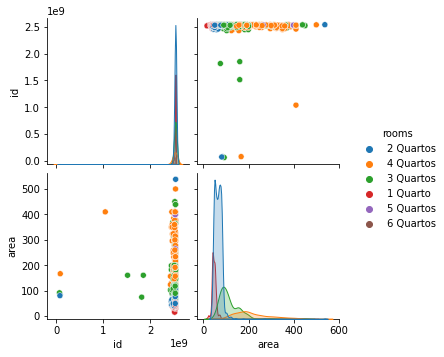

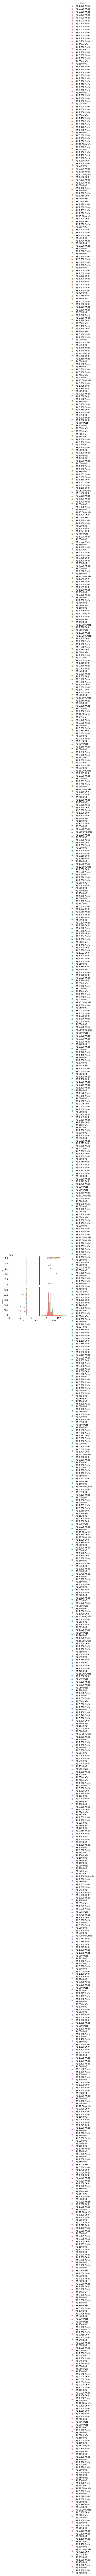

In [9]:
# Visualize pairplot of df
sns.pairplot(df_an, hue='rooms')

sns.pairplot(df_an, hue='price')

sns.pairplot(df_an,hue = 'area')

In [19]:
df_an_rooms  = df_an.groupby('rooms')
df_an_rooms.describe().transpose()

rooms           1 Quarto     2 Quartos     3 Quartos     4 Quartos  \
id   count  3.690000e+02  1.661000e+03  7.300000e+02  3.500000e+02   
     mean   2.529326e+09  2.529879e+09  2.525398e+09  2.513149e+09   
     std    1.320910e+07  8.575572e+07  1.059520e+08  1.538047e+08   
     min    2.464826e+09  7.492414e+07  6.504922e+07  8.178276e+07   
     25%    2.526178e+09  2.531461e+09  2.531502e+09  2.519770e+09   
     50%    2.534394e+09  2.536170e+09  2.536416e+09  2.531459e+09   
     75%    2.538386e+09  2.538452e+09  2.538584e+09  2.536441e+09   
     max    2.539731e+09  2.539765e+09  2.539766e+09  2.539752e+09   
area count  3.690000e+02  1.661000e+03  7.300000e+02  3.500000e+02   
     mean   4.587534e+01  6.444491e+01  1.150849e+02  2.155114e+02   
     std    9.153917e+00  1.936850e+01  5.412697e+01  7.797482e+01   
     min    1.600000e+01  3.600000e+01  4.500000e+01  9.600000e+01   
     25%    4.000000e+01  5.000000e+01  8.100000e+01  1.570000e+02   
     50%    4.500000e+01  6.400000e+01  1.000000e+02  1.920000e+02   
     75%    5.000000e+01  7.500000e+01  1.457500e+02  2.590000e+02   
     max    8.400000e+01  5.380000e+02  4.500000e+02  5.000000e+02   

rooms          5 Quartos     6 Quartos  
id   count  2.200000e+01  1.000000e+00  
     mean   2.531119e+09  2.521325e+09  
     std    6.735122e+06           NaN  
     min    2.515857e+09  2.521325e+09  
     25%    2.531244e+09  2.521325e+09  
     50%    2.531963e+09  2.521325e+09  
     75%    2.534626e+09  2.521325e+09  
     max    2.538970e+09  2.521325e+09  
area count  2.200000e+01  1.000000e+00  
     mean   3.163636e+02  4.000000e+02  
     std    6.855067e+01           NaN  
     min    1.830000e+02  4.000000e+02  
     25%    2.650000e+02  4.000000e+02  
     50%    2.880000e+02  4.000000e+02  
     75%    3.935000e+02  4.000000e+02  
     max    3.990000e+02  4.000000e+02